In [1]:
# Este entorno de Python 3 es similar a Jupyter Notebook
# Viene con varias librerías instaladas. Para más információn podés consultar 
# la imagen de docker que utiliza (https://github.com/kaggle/docker-python)

import numpy as np 
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Los archivos del zip "chest_xray.zip" están disponibles automáticamente en la 
# carpeta "/kaggle/input/aa2019unlp/chest_xray"
# (o "../input/aa2019unlp/chest_xray")
# Por ejemplo, el siguiente código imprime todos los archivos disponibles:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Cualquier resultado que guarden en el directorio actual queda como un "output" en el workspace


Using TensorFlow backend.


/kaggle/input/aa2019unlp/chest_xray/val/normal/0375_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0374_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0301_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0364_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0311_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0303_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0327_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0273_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0336_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0368_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0351_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0352_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0316_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0320_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0312_normal.jpg
/kaggle/input/aa2019unlp/chest_xray/val/normal/0261_nor

Hay 3 directorios con los tres subconjuntos de datos:  ['val', 'train', 'test']
La carpeta de cada subconjunto tiene dos subcarpetas: NORMAL y PNEUMONIA
Las imágenes tienen tamaño: (600, 600)


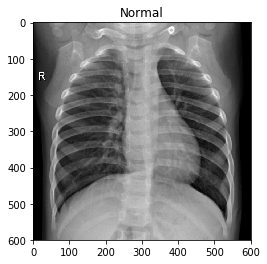

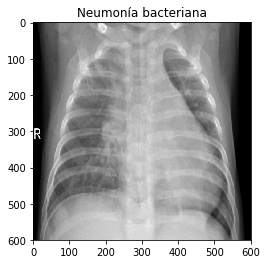

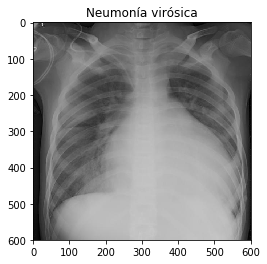

In [2]:
from keras.preprocessing.image import load_img
dataset_folderpath="/kaggle/input/aa2019unlp/chest_xray"
print("Hay 3 directorios con los tres subconjuntos de datos: ",os.listdir(dataset_folderpath))
print("La carpeta de cada subconjunto tiene dos subcarpetas: NORMAL y PNEUMONIA")

train_folderpath = os.path.join(dataset_folderpath,"train")
val_folderpath = os.path.join(dataset_folderpath,"val")
test_folderpath = os.path.join(dataset_folderpath,"test")

img_name = '1500_normal.jpg'
image_path= f'normal/{img_name}'
img_normal = load_img(os.path.join(train_folderpath,image_path))

print(f"Las imágenes tienen tamaño: {img_normal.size}")

plt.imshow(img_normal)
plt.title("Normal")
plt.show()

img_name = '0864_bacteria.jpg'
image_path= f'pneumonia/{img_name}'
img_bacteria = load_img(os.path.join(train_folderpath,image_path))
plt.imshow(img_bacteria)
plt.title("Neumonía bacteriana")
plt.show()


img_name = '3799_virus.jpg'
image_path= f'pneumonia/{img_name}'
img_virus = load_img(os.path.join(train_folderpath,image_path))
plt.imshow(img_virus)
plt.title("Neumonía virósica")
plt.show()


In [3]:
from keras.preprocessing.image import ImageDataGenerator


# Tamaño objetivo para escalar las imágenes. 
h,w,c = 32, 32, 3

batch_size=32

# Preprocesamiento de cada subconjunto
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    )

val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    )

test_datagen = ImageDataGenerator(
    rescale=1. / 255,
    )

# Generadores de los subconjuntos. Reciben un directorio, y 
# cada carpeta del directorio se interpreta como una clase distinta.
# En este caso como cada directorio tiene 2 subdirectorios, NORMAL y PNEUMONIA,
# por ende, habrá dos clases.
# Además, al especificar el "class_mode" como binary, la salida se codifica como un solo valor
# (0 o 1), y no como un vector one-hot de dos elementos.

train_generator = train_datagen.flow_from_directory(
    train_folderpath, # directorio de donde cargar las imagenes (train)
    target_size=(h,w),
    batch_size=batch_size,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_folderpath, # directorio de donde cargar las imagenes (val)
    target_size=(h,w),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_folderpath,# directorio de donde cargar las imagenes (test)
    target_size=(h,w),
    batch_size=batch_size,
    class_mode=None, # IMPORTANTE ya que los ej de test no tienen clase
    shuffle=False # IMPORTANTE ya que nos importa el orden para el archivo de submission
    )


n_train=train_generator.samples
n_val=val_generator.samples
n_test=test_generator.samples
n_clases=train_generator.num_classes
print(f"Los conjuntos de train, val y test tienen {n_train}, {n_val} y {n_test} ejemplos respectivamente.")
print(f"Los conjuntos de datos tienen {n_clases} clases.")

Found 5088 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Found 512 images belonging to 1 classes.
Los conjuntos de train, val y test tienen 5088, 256 y 512 ejemplos respectivamente.
Los conjuntos de datos tienen 2 clases.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(h,w,c)))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                196672    
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 196,737
Trainable params: 196,737
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
from keras import backend as K
# Definición de las métricas F1, recall y precision utilizando Keras.

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [6]:
val_steps=max(1,n_val // batch_size)
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy",f1_m,precision_m, recall_m])
model.fit_generator(train_generator,
                    steps_per_epoch=n_train // batch_size,
                    epochs=2,
                    validation_data=val_generator,
                    validation_steps=val_steps
                    )

Epoch 1/2
159/159 [==============================] - 23s 144ms/step - loss: 0.3851 - accuracy: 0.8341 - f1_m: 0.8904 - precision_m: 0.8424 - recall_m: 0.9588 - val_loss: 0.2602 - val_accuracy: 0.8789 - val_f1_m: 0.8824 - val_precision_m: 0.8236 - val_recall_m: 0.9596
Epoch 2/2
159/159 [==============================] - 15s 95ms/step - loss: 0.2335 - accuracy: 0.9035 - f1_m: 0.9370 - precision_m: 0.9232 - recall_m: 0.9566 - val_loss: 0.1326 - val_accuracy: 0.9180 - val_f1_m: 0.9194 - val_precision_m: 0.8911 - val_recall_m: 0.9545


In [7]:
#Evaluar el accuracy del modelo en el conjunto entero de entrenamiento
print("*********** Conjunto de entrenamiento ***********")
train_generator.reset()
asd = model.predict_generator(train_generator,steps=n_train // batch_size)
scores = model.evaluate_generator(train_generator,steps=n_train // batch_size)
for metric,score in zip(model.metrics_names,scores):
    print(f"{metric}: {score:.2f}")

print()
# Evaluar el accuracy del modelo en el conjunto entero de validación
print("*********** Conjunto de validación ***********")
val_generator.reset()
asd = model.predict_generator(val_generator,steps=n_val // batch_size)
scores = model.evaluate_generator(val_generator,steps=n_val // batch_size)
for metric,score in zip(model.metrics_names,scores):
    print(f"{metric}: {score:.2f}")


*********** Conjunto de entrenamiento ***********
loss: 0.11
accuracy: 0.94
f1_m: 0.96
precision_m: 0.95
recall_m: 0.97

*********** Conjunto de validación ***********
loss: 0.13
accuracy: 0.92
f1_m: 0.92
precision_m: 0.89
recall_m: 0.95


In [8]:
# predecir sobre el conjunto de test y generar el csv resultante
y_prob = model.predict_generator(test_generator,steps=n_test // batch_size)
# Establecer un umbral
treshold=0.5
# Convertir probabilidades a etiquetas con el umbral
y_pred = (y_prob[:,0]>0.5).astype(int)
# quitar el nombre de la carpeta del nombre de archivo
filenames=[ os.path.basename(f) for f in test_generator.filenames]
# igual cant de archivos que de predicciones
assert(len(y_pred)==len(filenames))

# Generar CSV con las predicciones
import csv
with open('solutions.csv', mode='w') as f:
    writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    writer.writerow(['Id','Expected'])
    print("Id, Expected")
    for f,y in zip(filenames,y_pred):
        print(f"{f}, {str(y)}")
        writer.writerow([f,str(y)])



Id, Expected
test_0000.jpg, 1
test_0001.jpg, 0
test_0002.jpg, 0
test_0003.jpg, 1
test_0004.jpg, 0
test_0005.jpg, 1
test_0006.jpg, 1
test_0007.jpg, 0
test_0008.jpg, 0
test_0009.jpg, 1
test_0010.jpg, 1
test_0011.jpg, 0
test_0012.jpg, 1
test_0013.jpg, 1
test_0014.jpg, 0
test_0015.jpg, 1
test_0016.jpg, 0
test_0017.jpg, 0
test_0018.jpg, 0
test_0019.jpg, 1
test_0020.jpg, 1
test_0021.jpg, 0
test_0022.jpg, 1
test_0023.jpg, 0
test_0024.jpg, 0
test_0025.jpg, 1
test_0026.jpg, 0
test_0027.jpg, 1
test_0028.jpg, 0
test_0029.jpg, 1
test_0030.jpg, 1
test_0031.jpg, 0
test_0032.jpg, 1
test_0033.jpg, 1
test_0034.jpg, 1
test_0035.jpg, 1
test_0036.jpg, 1
test_0037.jpg, 1
test_0038.jpg, 1
test_0039.jpg, 1
test_0040.jpg, 1
test_0041.jpg, 1
test_0042.jpg, 1
test_0043.jpg, 1
test_0044.jpg, 0
test_0045.jpg, 1
test_0046.jpg, 1
test_0047.jpg, 1
test_0048.jpg, 0
test_0049.jpg, 1
test_0050.jpg, 1
test_0051.jpg, 1
test_0052.jpg, 1
test_0053.jpg, 1
test_0054.jpg, 0
test_0055.jpg, 1
test_0056.jpg, 0
test_0057.jpg, 0
t